In [1]:
import pandas as pd
import numpy as np

datos = pd.read_csv("seeds_dataset-Copy1.txt", delimiter="\t")
datos

15.26  14.84   0.871  5.763  3.312  2.221   5.22  1
0    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4    14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1
..     ...    ...     ...    ...    ...    ...    ... ..
204  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
205  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
206  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
207  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
208  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[209 rows x 8 columns]

In [7]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(datos.iloc[:,:-1])
y = datos.iloc[:,-1]

In [3]:
from sklearn.model_selection import StratifiedKFold

K=10
cv_strat = StratifiedKFold(n_splits=K, shuffle=True)

In [16]:
max_clusters = 50
min_clusters = len(np.unique(y))
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((K, max_clusters-min_clusters+1)))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"
tabla

Clusters    3    4    5    6    7    8    9   10   11   12  ...   41   42  \
CV                                                          ...             
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
9         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

Clusters   43   44   45   46   47   48   49   50  
CV                                                
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
8         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 48 columns]

In [19]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score

for c in k:
    cv = 0
    kmedias = KMeans(n_clusters=int(c), random_state=0) 
    
    for train_index, test_index in cv_strat.split(x,y):
        x_train, y_train, x_test, y_test = x[train_index], y[train_index], x[test_index], y[test_index]
        kmedias.fit(x_train)
        modas = -1 * np.ones(int(c))
        
        for i in range(int(c)):
            modas[i] = mode(y_train[kmedias.labels_ == i])[0]
            
        y_predict = modas[kmedias.predict(x_test)]
        tabla.loc[cv,c] = accuracy_score(y_test, y_predict)
        cv+=1
tabla

Clusters         3         4         5         6         7         8  \
CV                                                                     
0         0.904762  0.952381  0.952381  0.761905  0.857143  0.761905   
1         0.952381  0.714286  0.904762  0.761905  0.857143  0.904762   
2         1.000000  1.000000  0.857143  0.952381  0.952381  0.809524   
3         1.000000  0.809524  0.809524  0.761905  1.000000  0.952381   
4         0.857143  0.904762  0.857143  0.857143  0.904762  0.809524   
5         0.952381  0.857143  1.000000  0.857143  0.761905  0.952381   
6         0.904762  0.904762  0.904762  0.857143  0.809524  0.952381   
7         0.857143  0.904762  0.809524  0.904762  0.952381  1.000000   
8         0.952381  0.904762  1.000000  0.952381  0.904762  0.761905   
9         0.900000  0.950000  0.950000  1.000000  1.000000  0.900000   

Clusters         9        10        11        12  ...        41        42  \
CV                                                ...                       
0         0.952381  0.952381  0.857143  0.952381  ...  0.904762  0.761905   
1         0.857143  1.000000  0.904762  0.857143  ...  0.857143  0.904762   
2         0.904762  0.904762  1.000000  0.904762  ...  0.761905  0.714286   
3         0.809524  0.904762  0.761905  0.952381  ...  0.857143  0.952381   
4         0.761905  0.857143  1.000000  0.857143  ...  0.952381  0.952381   
5         1.000000  0.904762  0.904762  0.857143  ...  0.952381  1.000000   
6         0.952381  0.857143  0.809524  1.000000  ...  0.952381  0.857143   
7         0.904762  0.761905  0.904762  0.857143  ...  0.809524  0.857143   
8         0.857143  0.952381  0.857143  0.904762  ...  0.952381  1.000000   
9         0.850000  0.950000  0.950000  0.800000  ...  0.950000  0.850000   

Clusters        43        44        45        46        47        48  \
CV                                                                     
0         0.952381  0.857143  0.904762  0.952381  0.857143  0.857143   
1         0.857143  0.952381  0.904762  0.952381  0.952381  1.000000   
2         1.000000  0.904762  1.000000  0.904762  0.857143  0.952381   
3         0.857143  0.857143  0.904762  0.952381  0.857143  0.857143   
4         0.904762  0.857143  0.857143  0.904762  0.904762  0.904762   
5         0.857143  0.857143  0.952381  0.809524  0.904762  0.952381   
6         0.857143  0.904762  0.809524  0.952381  0.857143  0.952381   
7         0.952381  0.952381  0.904762  0.761905  1.000000  0.904762   
8         0.809524  1.000000  0.809524  0.952381  0.952381  0.904762   
9         0.900000  0.900000  0.950000  0.900000  0.850000  0.850000   

Clusters        49        50  
CV                            
0         0.904762  0.904762  
1         0.904762  0.904762  
2         0.857143  0.857143  
3         0.904762  0.857143  
4         0.857143  1.000000  
5         0.904762  0.809524  
6         0.952381  0.904762  
7         0.809524  0.857143  
8         0.857143  0.904762  
9         0.950000  0.900000  

[10 rows x 48 columns]

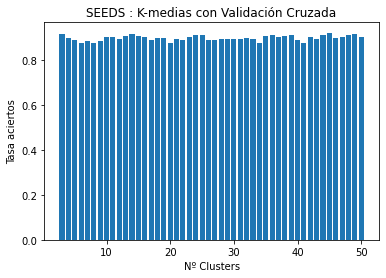

El valor de K más óptimo es: 45 que da una tasa de acierto de: 0.923095238095238


In [18]:
import matplotlib.pyplot as plt

plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean())
plt.title("SEEDS : K-medias con Validación Cruzada")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())